# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Dhananjay Arora </font>

# INTRODUCTION

Machine learning, these days is not only machine which is learning from the past. It started with the pattern recognition and computers learning on its own without the need of being explicitly programmed. But now, researchers want to computer to learn from data and perform tasks on its own. Some examples are:
- Self driving Google car
- Online recommendation offers as offers from Netflix
- Fraud detection

Only should know all mathematical concepts thoroughly in order to implement a good machine learning algorithm successfully.

This assignment aims at learning and applying linear regression. 

**Regression analysis** is a part of statistical modeling which assists in estimating relationships among variables. It helps in modeling and analyzing variables with focus on one dependent variable and one or more independent variables.

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

Firstly, data is fetched from a file; then pre-processing is done (transformation of raw data into understandable format), in which data is cleaned and important feature values are also taken into consideration etc. After that comes the most important task which is data visualization. It is important because large data means nothing unless some graphs are plotted based on that and some visualization is done.
After that comes the preliminary observation; which says, what is being understood or concluded based on the tasks performed before.

In this assignment, I have also explained Least Squares and Least Mean Squares and also implemented the same.
After that some experiments are being done with the dataset. All this will be explained later on.


The method of **least squares** is a standard approach in regression analysis to approximate the solution of overdetermined systems, i.e., sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the residuals made in the results of every single equation.

**Least mean squares (LMS)** algorithms are a class of adaptive filter used to mimic a desired filter by finding the filter coefficients that relate to producing the least mean square of the error signal (difference between the desired and the actual signal). It is a stochastic gradient descent method in that the filter is only adapted based on the error at the current time. 


# Data

## a) Description - Introduction of data for regression & source

This dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Source of the data**

This data is picked from UCI machine learning repository.
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.
URL for UCI repository - http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## b) Reading the data

- The data is present in a comma separated value file.
- Header information is there in the CSV file.

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as scipyst
complete_dataset=pd.read_csv('C:\\Users\\arora\\Documents\\Bike-Sharing-Dataset\\hour.csv')

## c) Data Pre-Processing

- Splitting the data into train and test sets.
- Remove null value rows, if any.

In [2]:
 def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

Splitting and checking the shape of both the sets, below:

In [3]:
data_partitions=partition_data(complete_dataset)
train_dataset=data_partitions[0]
print("Shape of training set",train_dataset.shape)
test_dataset=data_partitions[1]
print("Shape of test set",test_dataset.shape)

Shape of training set (13903, 17)
Shape of test set (3476, 17)


Checking the data type of all features and file storage size as below:

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 17 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 1.8+ MB


Performing some basic mathematical function on data set using describe() as below:

In [5]:
train_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,6952.000000,2.263828,0.378192,5.650147,11.546573,0.027404,2.999425,0.684457,1.419981,0.499170,0.478017,0.622996,0.194097,34.037977,140.601165,174.639143
std,4013.594731,1.036254,0.484953,3.218423,6.912235,0.163264,2.005710,0.464749,0.644060,0.197716,0.176614,0.198194,0.123023,47.341186,137.512367,166.955414
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3476.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,31.000000,37.000000
50%,6952.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,15.000000,107.000000,130.000000
75%,10427.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600,46.000000,202.000000,258.000000
max,13903.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,796.000000,957.000000


Listing the top 10 rows as below:

In [6]:
train_dataset.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Listing the last 10 rows as below:

In [7]:
train_dataset.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13893,13894,2012-08-07,3,1,8,2,0,2,1,1,0.70,0.6667,0.84,0.1343,6,7,13
13894,13895,2012-08-07,3,1,8,3,0,2,1,1,0.70,0.6667,0.84,0.0000,0,6,6
13895,13896,2012-08-07,3,1,8,4,0,2,1,1,0.68,0.6364,0.83,0.1343,2,7,9
13896,13897,2012-08-07,3,1,8,5,0,2,1,1,0.70,0.6667,0.79,0.1045,3,33,36
13897,13898,2012-08-07,3,1,8,6,0,2,1,2,0.70,0.6667,0.79,0.1940,3,176,179
13898,13899,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,21,481,502
13899,13900,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,41,664,705
13900,13901,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,44,283,327
13901,13902,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,89,161,250
13902,13903,2012-08-07,3,1,8,11,0,2,1,2,0.76,0.7273,0.66,0.0896,84,130,214


Checking whether the dataset contains any null value as below:

In [8]:
 train_dataset.isnull().sum().sort_values(ascending=False)

cnt           0
weekday       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
workingday    0
registered    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
instant       0
dtype: int64

Since, there is no null value in the dataset as it can be seen above, so dataset is already clean.

### Plot for understanding are as below:

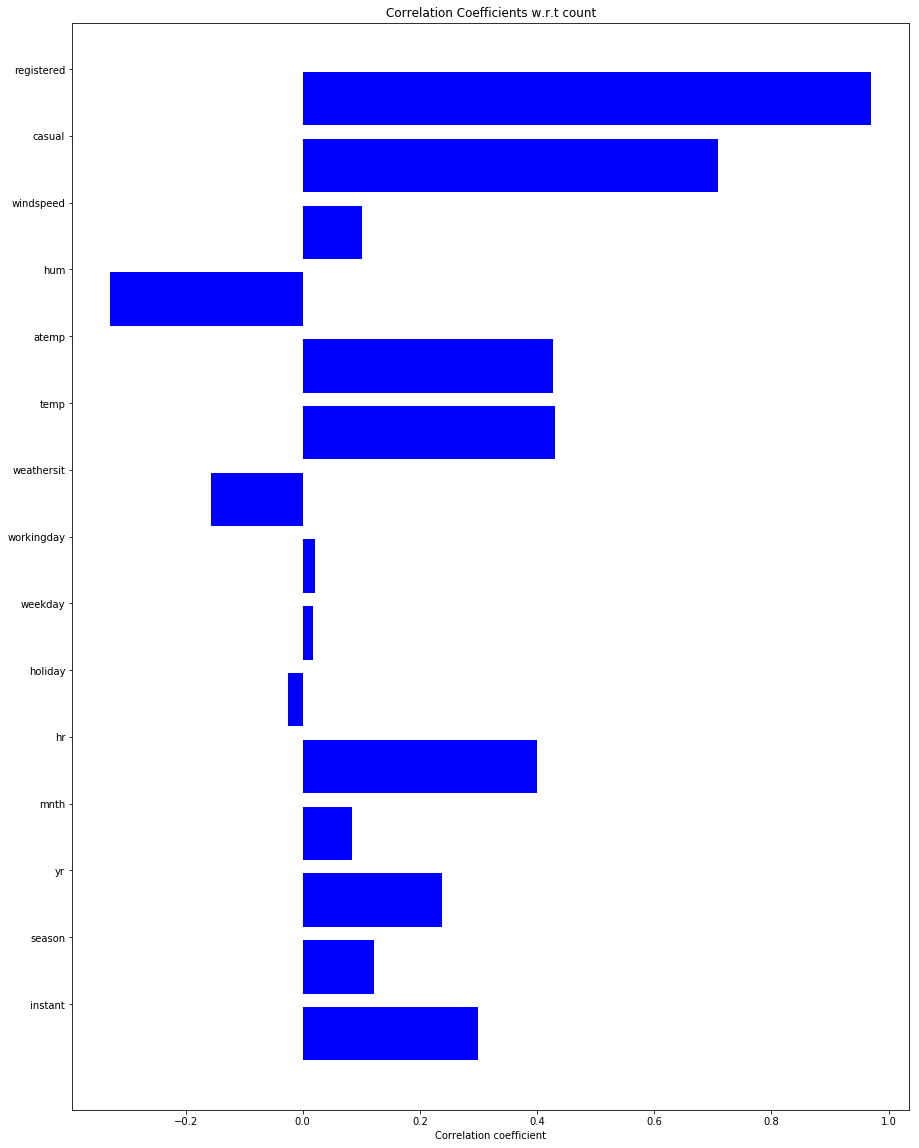

In [9]:
num_feat=train_dataset.columns[train_dataset.dtypes!=object]
num_feat=num_feat[0:-1]

labels = []
values = []


for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_dataset[col].values, train_dataset.cnt.values)[0,1])

ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,20))
rects = ax.barh(ind, np.array(values), color='blue')
ax.set_yticks(ind+((width)/1.8))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t count");

In the above image, it can be seen that number of registered users who use rental bikes is more than number of casual users.

Moreover, on working days bikes are rented more than on holidays.

Next, we will visualize **Correlation Matrix**:

It consists of a table depicting correlation coefficients among variables. Every entry in the table depicts the correlation among two variables.

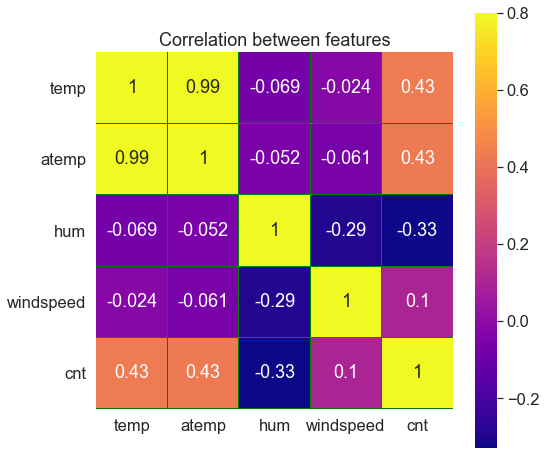

In [10]:
correlation_matrix=train_dataset[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='plasma',linecolor="green")
plt.title('Correlation between features');

Above is the depiction of correlation between different features in the dataset.

Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius, as per the figure above.

Below is the depiction of some features using pairplot:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


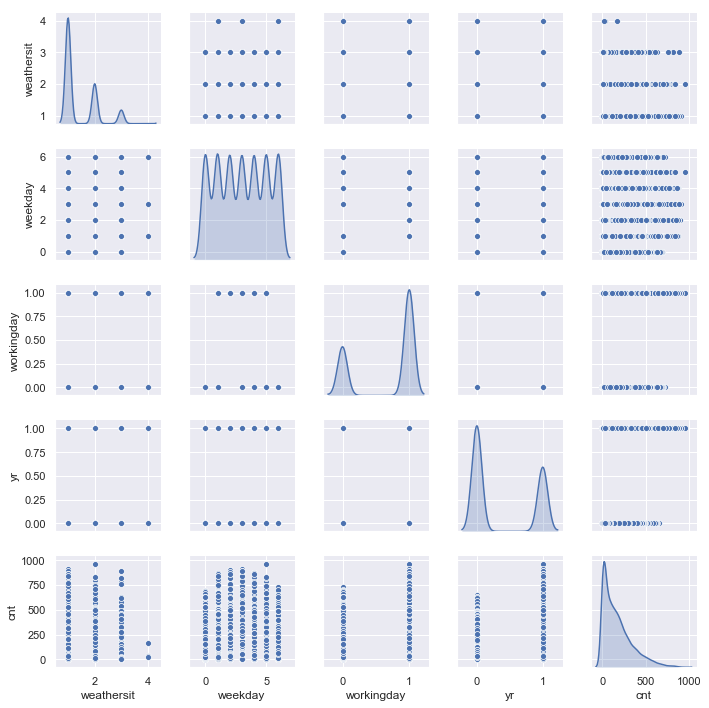

In [11]:
sns.set()
columns = ['weathersit', 'weekday', 'workingday', 'yr', 'cnt']
sns.pairplot(train_dataset[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

From the above pair-plot, it can be seen that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.

Also, It can be observed that on Satudays and Sundays, bikes are rented less as compared to other days.

On a working day, bikes are rented more. (*working days exclude holidays too*).

Bikes were rented more in year 2012 as compared to year 2011.

**Plotting the Distribution Curves for the feature variables as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


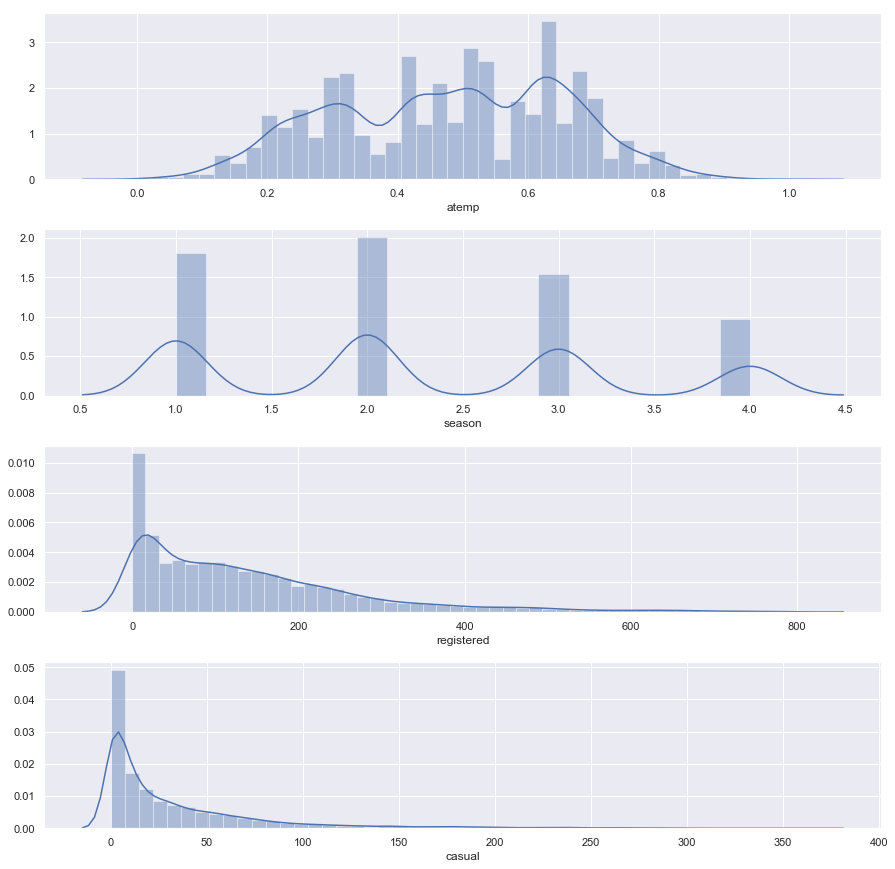

In [12]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
distribution_plot_list=['atemp', 'season', 'registered', 'casual']
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 5):
    ax = fig.add_subplot(4,1, i)
    ax = sns.distplot(train_dataset[distribution_plot_list[(i-1)]])

From the above figure, it can be observed that the values of Normalized feeling temperature is equally distributed.
    Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).

**Bar-plot of weather condition is as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


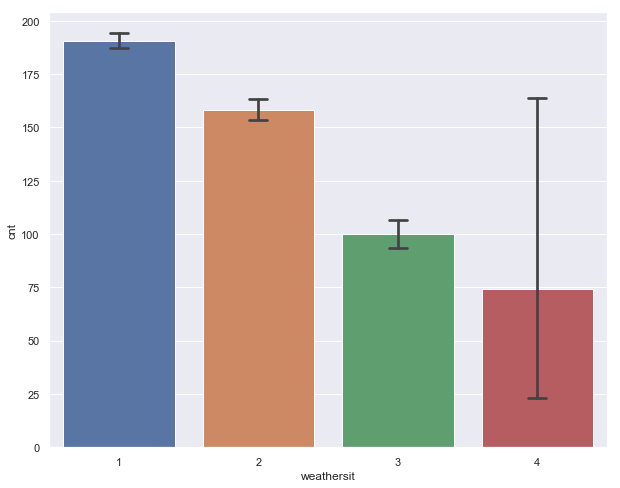

In [13]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="weathersit", y="cnt", data=train_dataset, capsize=.13)

Above bar plot shows that bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. 

Below are those weather conditions:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Below is the point-plot for count vs normalized humidity**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


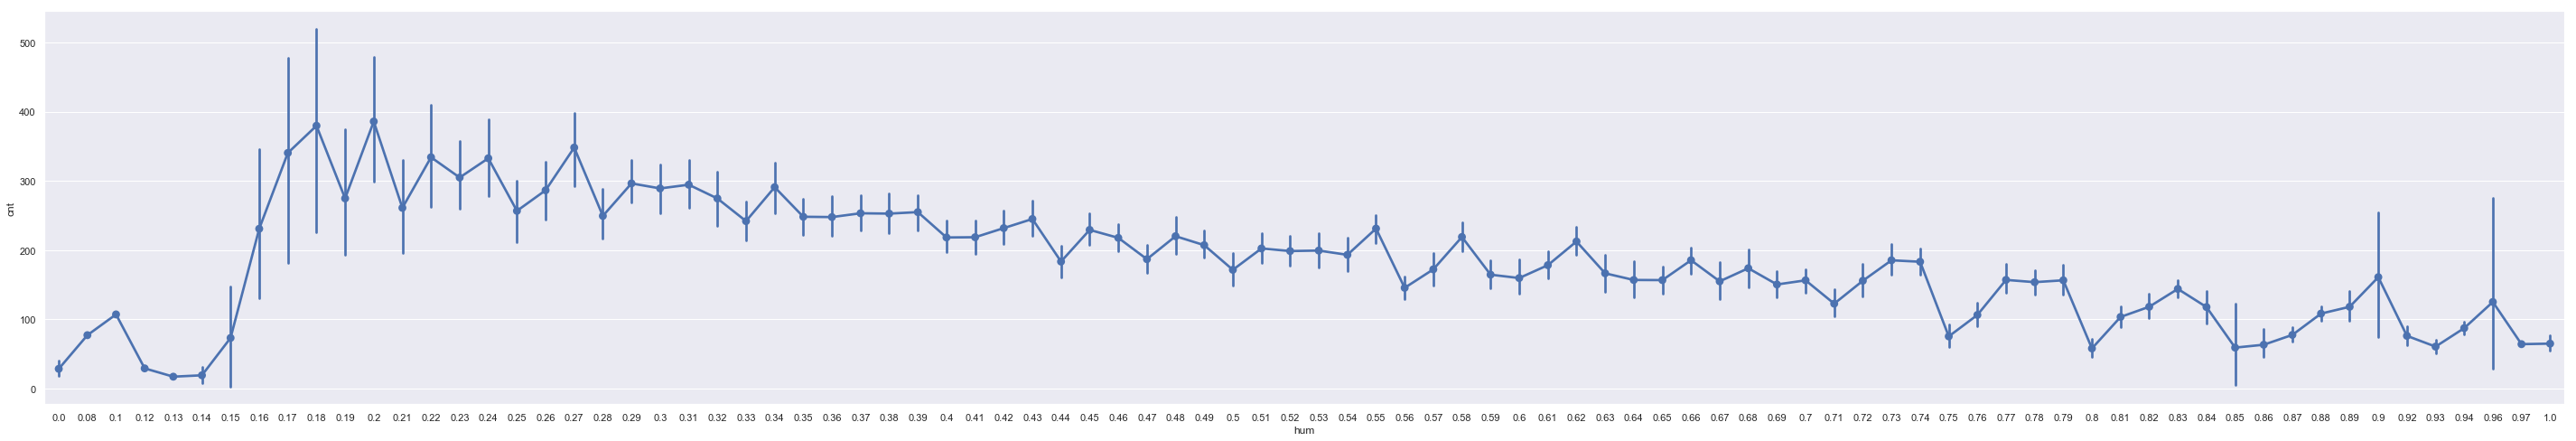

In [14]:
plt.figure(figsize=(50,8))
ax = sns.pointplot(x="hum",y="cnt",data= train_dataset)

Upon zooming above point-plot, it can be seen that most bikes are rented when normalized humidity value is near 0.2

**Below point-plot shows count of bikes vs weekday with heu as holiday**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


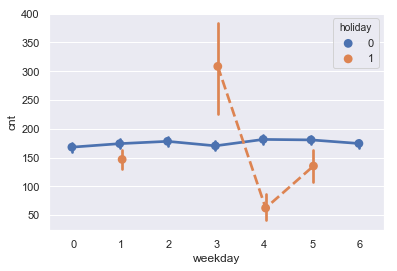

In [15]:
ax = sns.pointplot(x="weekday",y="cnt",hue="holiday",data= train_dataset, dodge=True, linestyles=["-","--"])

From the above point plot, it can be seen that count of bikes rented is usually the same for all days when it is not a holiday. But when it is a holiday, then the count of bikes rented is most on a Wednesday and least on a Tuesday.

**Below is the bar plot for bike rented at different hours**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


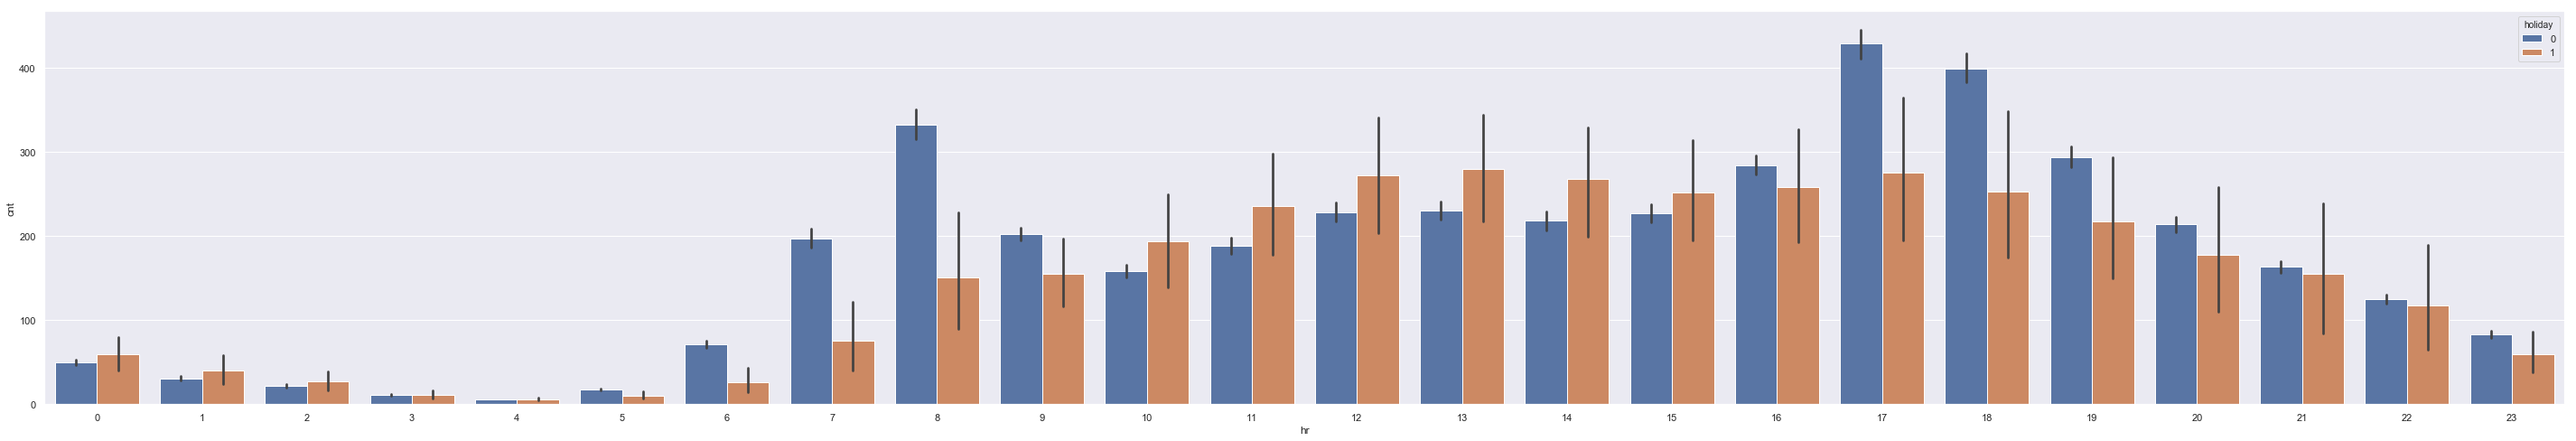

In [16]:
plt.figure(figsize=(50,8))
ax = sns.barplot(x="hr",y="cnt",hue="holiday",data= train_dataset)

From the above graph, it can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

## e) Preliminary observation

Below is the list of observations from the regression data provided after doing regression analysis on the basis of plots:
- Number of registered users who use rental bikes is more than number of casual users.
- Moreover, on working days bikes are rented more than on holidays.
- Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius
- It can be said that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.
- Also, it can be observed that on Saturdays and Sundays, bikes are rented less as compared to other days.
- On a working day, more number of bikes are rented. (*working days exclude holidays too*).
- Bikes were rented more in year 2012 as compared to year 2011.
- Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350+. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).
- Bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. These weather conditions are namely:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Most bikes are rented when normalized humidity value is near 0.2
- Count of bikes rented is usually the same for all days when the day is not a holiday. But when it is a holiday, then the count of bikes rented is the most on a Wednesday and least on a Tuesday.
- It can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

Some other observations are also there and are listed above along with the plots.

# Method 
 
Applying LS and LMS methods on the data and discussing the results. 
 
### Least Squares Model
This model attempts to reduce the sum of squared residuals. It finds the best fit of the model at one go by going through the training dataset at once. This approach is not good in case of a huge data set. 
The least squares approach to regression is based upon reducing the deviation scores.
Least Squares model can be symbolized with the help of following equation:

$$
\begin{align}
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \Tm
\end{align}
$$


**Description of Least Squares Model code**

*Least Squares Class* had two methods, that is, train and use which are being overridden below:
- *Train method:* 
This contains a feature matrix X and a target variable matrix, T ( that is, count).
Using these variables, we are training the LS model and computing the coefficients(w).
Now, add ones to X and compute w using the equation specified above.
*self.W = np.linalg.inv(X1.T @ X1) @ X1.T @ T* 
    
- *Use method:*
Feature matrix, X is being used in this method. It helps to compute the predicted variables and the same is being returned.
*y = self.add_ones(X) @ self.W*  


### Least Mean Squares Model
This model is a progressive learning model and is helpful for huge datasets and not for small datasets. Coefficients (w) is being recalculated for each datapoint in this model. 
It starts with a random value of w and the value keeps changing as it come across new values of data point. It stops when it converges.
Least Mean Squares model can be symbolized with the help of following equation:

Sequential Gradient Descent
$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$
where alpha is the learning rate,
 E_k is the error of k^{(th)} sample. 


Another important formulae being used is as below:

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$


**Implementation of Least Mean Squares Model code**
The least mean squares model’s base class have 3 declared methods (train_step, train, and use) which are being overridden below:
- *Train Step Method:*  
This method takes a row of features and predict the output.
In the starting of the feature tuple, one is appended. In method “intialise_w”, it is being verified that self.w has been assigned or not. If it is not assigned, then it is being initialized with 0s array. This is done because w needs to be initialized in LMS as it is an online learning technique.
Predicted y is computed then with the help of existing vale of weights.
*y = self.w @ x1*
And then w is computed using *self.w -= self.alpha * (y - t) * x1*

- *Train Method:*
We provide X and T to this method, X is the feature matrix and T is the resulting matrix.
Iteration is being done on each tuple of X and,
Training is done in this method in steps, using train step method. 

- *Use Method:* 
We provide X to this Use method as argument and compute predicted value of y and return the same.
by *y = self.add_ones(X) @ self.w.reshape(x_dim,1)*             

             
             
# CODE
      

### Super Class Definition

In [17]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [18]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        N = X.shape[0]
        X1=self.add_ones(X)
        self.W = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
            
    # apply the learned model to data X
    def use(self, X):
        y = self.add_ones(X) @ self.W
        return y

### Least Mean Squares

In [19]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    
    def train(self, X, T):
      
        X1=self.add_ones(X)
        self.w=np.zeros(X1.shape[1]);
      
        for x, t in zip(X, T):
            self.train_step(x, t)
   
    def intialise_w(self,x):
        if not(isinstance(self.w,np.ndarray)) :
            self.w= np.zeros(len(x))
       
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
     
     
         x1=np.append([1],x)
    
         self.intialise_w(x1)
         y = self.w @ x1
         self.w -= self.alpha * (y - t) * x1
    
    # apply the current model to data X
    def use(self, X):
       
         x_dim=X.shape[1] + 1
         y = self.add_ones(X) @ self.w.reshape(x_dim,1)
       
         return y
        

### Usage Examples

In [20]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

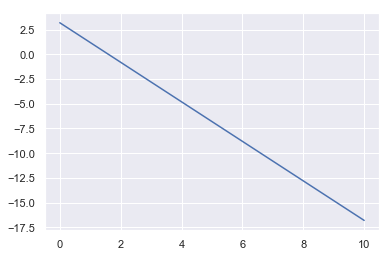

In [21]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

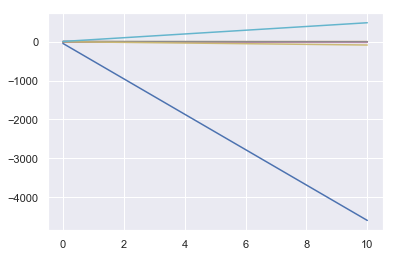

In [22]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

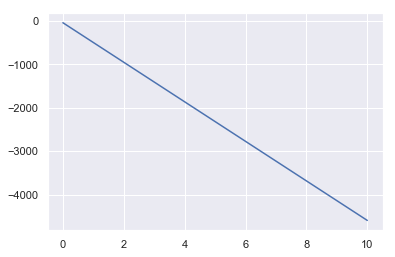

In [23]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

In [24]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

### a) Description

Now, I'll perform some experiments on the bike dataset which I have taken and will perform linear regression on that with the help of Least Squares and Least Mean Squares models.

The method of **least squares** is a standard approach in regression analysis to approximate the solution of overdetermined systems, i.e., sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the residuals made in the results of every single equation.

**Least mean squares (LMS)** algorithms are a class of adaptive filter used to mimic a desired filter by finding the filter coefficients that relate to producing the least mean square of the error signal (difference between the desired and the actual signal). It is a stochastic gradient descent method in that the filter is only adapted based on the error at the current time.

Then I'll combine various features and plot and visualize.

To measure the performance of the model, computation of Root Mean Square Error (RMSE), R Squared, Mean Squared Error and Mean absolute error is done. They help to know about how well a model will fit.

Data Pre-processing included using Exploratory Data Analysis to eliminate less impacting columns, and data was normalized. Also, whole dataset was already having integers values.

**Root mean squared error (RMSE)**: RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. RMSE is just the square root of **MSE** (mean squared error). 

**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

The coefficient of determination, or **R²** (sometimes read as R-two), is another metric we may use to evaluate a model and it is closely related to MSE, but has the advantage of being scale-free — it doesn’t matter if the output values are very large or very small, the R² is always going to be between -∞ and 1.

### b) Codes and their Visualization is as below:

In [25]:
# Data Pre-Processing
from sklearn import metrics
# Removed all rows in which a bike was not rented.
trial=train_dataset[train_dataset['cnt']>0]
# Registered, Hour, Temperature, Humidity
registered_vector =trial['registered'].values
hr_vector =trial['hr'].values
temp_vector=trial['temp'].values
hum_vector=trial['hum'].values

Below is the **Normalization Function** that normalizes the complete matrix column-wise.

In [26]:
def normalize(X):
       for i in range(X.shape[1]) :
           x_data = X[:,i]
           mu = x_data.mean() 
           std = x_data.std()
           X[:,i] = (x_data - mu) / std
       return X

Below is the least square with 4 features namely temperature, humidity, registered, and hour.
These features are taken because count has higher co-relation with them.

Coefficient of Determination, or R²: 0.9522295075318585
Mean Squared Error: 1331.4641914693657
Root Mean Squared Error: 36.48923391179055
Mean Absolute Error: 22.542849250173052


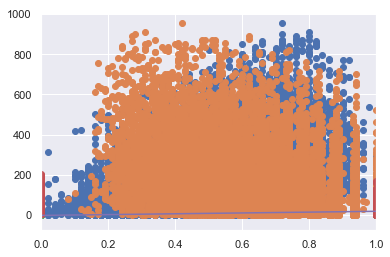

In [27]:
list=[temp_vector,hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

Below is the least square with 3 features namely temperature, humidity, and registered.

Coefficient of Determination, or R²: 0.9517287275733132
Mean Squared Error: 1345.4219831553828
Root Mean Squared Error: 36.67999431782103
Mean Absolute Error: 22.59548614191836


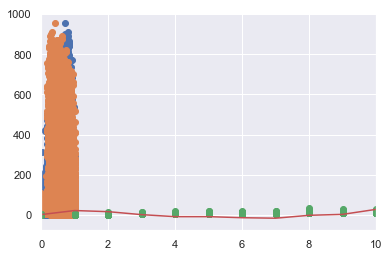

In [28]:
list=[temp_vector,hum_vector,registered_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,10])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))


Below is the least square with 3 features namely temperature, humidity, and hour.

Coefficient of Determination, or R²: 0.35035170638728996
Mean Squared Error: 18107.065581778654
Root Mean Squared Error: 134.5624969364743
Mean Absolute Error: 98.7432984036113


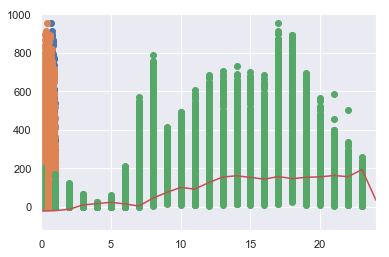

In [29]:
list=[temp_vector,hum_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,24])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))


Below is the least square with 3 features namely humidity, registered, and hour.

Coefficient of Determination, or R²: 0.9445656802190351
Mean Squared Error: 1545.0711925576327
Root Mean Squared Error: 39.30739361185924
Mean Absolute Error: 24.022340942766782


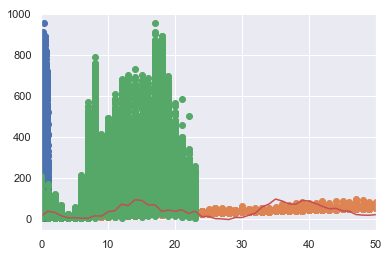

In [30]:
list=[hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,50])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))


Below is the least square with 2 features namely temperature, and humidity.

Coefficient of Determination, or R²: 0.27519952089504884
Mean Squared Error: 20201.71520173631
Root Mean Squared Error: 142.13273796608686
Mean Absolute Error: 106.40727432004216


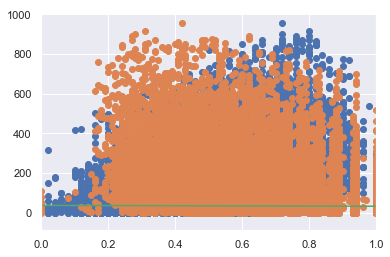

In [31]:
list=[temp_vector,hum_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))


Below is the least square with 2 features namely temperature, and hour.

Coefficient of Determination, or R²: 0.30422466758675304
Mean Squared Error: 19392.723259735234
Root Mean Squared Error: 139.25775834665455
Mean Absolute Error: 102.88518211965419


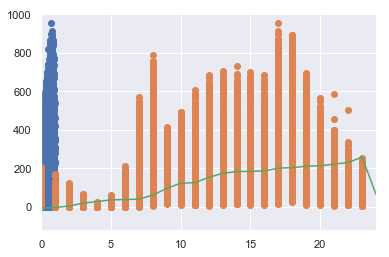

In [32]:
list=[temp_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,24])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))


Below is the least square with 2 features namely temperature, and registered.

Coefficient of Determination, or R²: 0.9483599157545646
Mean Squared Error: 1439.3178605624219
Root Mean Squared Error: 37.938342881080374
Mean Absolute Error: 23.159233007709336


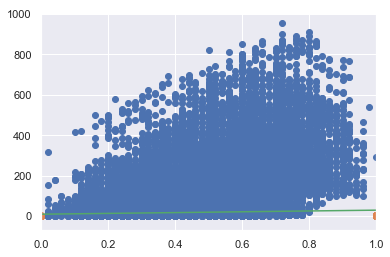

In [33]:
list=[temp_vector,registered_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

Below is the least square with 2 features namely humidity and hour.

Coefficient of Determination, or R²: 0.21196418879932988
Mean Squared Error: 21964.217030187716
Root Mean Squared Error: 148.20329628651217
Mean Absolute Error: 109.99306492199106


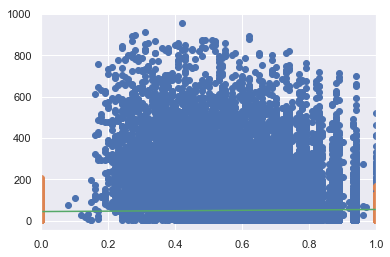

In [34]:
list=[hum_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

**LMS Plots are below:**

Below is the least mean squares with 4 features namely temperature, humidity, registered, and hour.

Coefficient of Determination, or R²: 0.9484834946227114
Mean Squared Error: 1449.2226674443384
Root Mean Squared Error: 38.06865728449505
Mean Absolute Error: 25.311171777194964


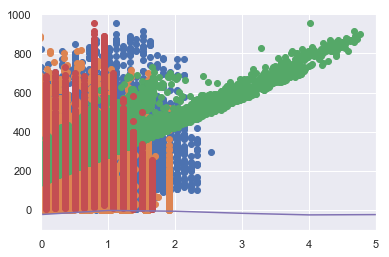

In [35]:
list=[temp_vector,hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,5])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 3 features namely temperature, humidity, and registered.

Coefficient of Determination, or R²: 0.033692135911148835
Mean Squared Error: 56595.80072398194
Root Mean Squared Error: 237.8987194668814
Mean Absolute Error: 172.22892301683106


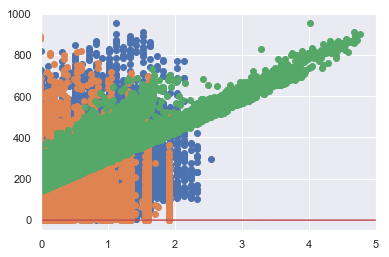

In [36]:
list=[temp_vector,hum_vector,registered_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.000001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,5])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 3 features namely temperature, humidity, and hour.

Coefficient of Determination, or R²: 0.0012598351783636996
Mean Squared Error: 58251.12826722965
Root Mean Squared Error: 241.3527051168676
Mean Absolute Error: 174.39649459515607


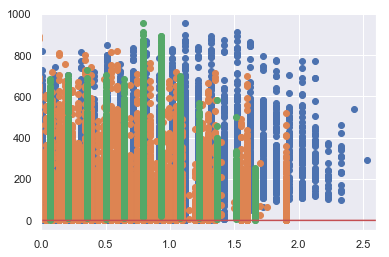

In [37]:
list=[temp_vector,hum_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)
lms = LMS(0.0000001)
lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,2.6])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 3 features namely temperature, registered, and hour.

Coefficient of Determination, or R²: 0.9468653296085124
Mean Squared Error: 1514.3587498936315
Root Mean Squared Error: 38.914762621576294
Mean Absolute Error: 25.081265004001747


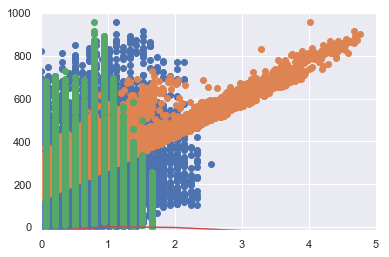

In [38]:
list=[temp_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,5])
plt.ylim([-15,1000])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 3 features namely humidity, registered, and hour.

Coefficient of Determination, or R²: 0.9178302101902406
Mean Squared Error: 2911.8581723824955
Root Mean Squared Error: 53.961636116619886
Mean Absolute Error: 41.782357218572855


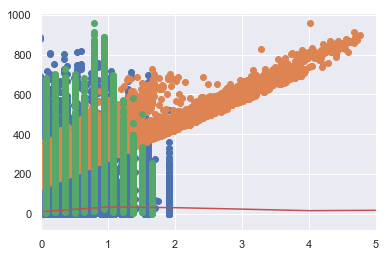

In [39]:
list=[hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,5])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 2 features namely temperature, and humidity.

Coefficient of Determination, or R²: 0.264894614612055
Mean Squared Error: 21722.356029974595
Root Mean Squared Error: 147.38506040292754
Mean Absolute Error: 104.02120560157468


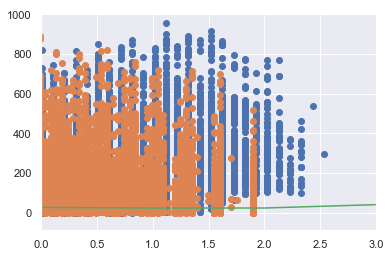

In [40]:
list=[temp_vector,hum_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.0001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,3])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 2 features namely registered, and hour.

Coefficient of Determination, or R²: 0.6217414453089652
Mean Squared Error: 11639.18632355029
Root Mean Squared Error: 107.88506070606017
Mean Absolute Error: 89.57858727010132


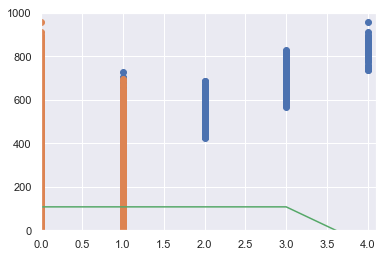

In [41]:
list=[registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,4.1])
plt.ylim([0,1000])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 2 features namely humidity, and registered.

Coefficient of Determination, or R²: 0.938151675448372
Mean Squared Error: 1855.575200646335
Root Mean Squared Error: 43.0763879712115
Mean Absolute Error: 30.99615913152734


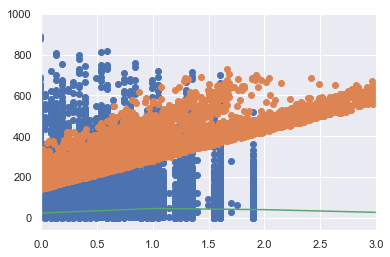

In [42]:
list=[hum_vector,registered_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,3])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 2 features namely temperature, and registered.

Coefficient of Determination, or R²: 0.9470863995436596
Mean Squared Error: 1553.7191799642824
Root Mean Squared Error: 39.41724470284906
Mean Absolute Error: 24.577963196134842


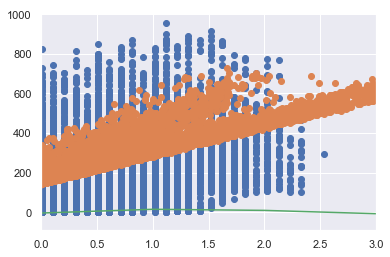

In [43]:
list=[temp_vector,registered_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.001)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,3])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the least mean squares with 2 features namely humidity, and hour.

Coefficient of Determination, or R²: -0.042434152488663335
Mean Squared Error: 45250.97543241122
Root Mean Squared Error: 212.72276660576605
Mean Absolute Error: 174.24109808130433


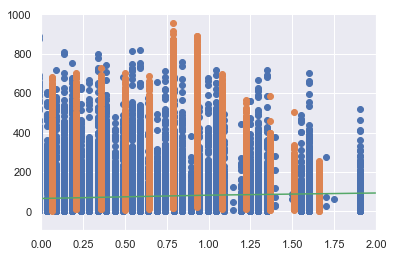

In [44]:
list=[hum_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,2])
plt.plot(lms.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,lms.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,lms.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,lms.use(X)))

Below is the **least squares** with 4 features namely temperature, humidity, registered, and hour.

Coefficient of Determination, or R²: 0.9522295075318585
Mean Squared Error: 1331.4641914693657
Root Mean Squared Error: 36.48923391179055
Mean Absolute Error: 22.542849250173052


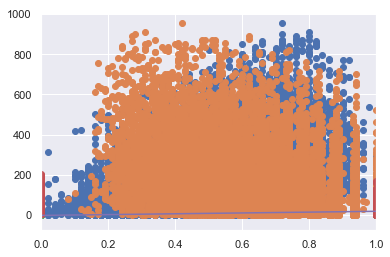

In [45]:
list=[temp_vector,hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])

plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

### c) Analysis / Comparision of Algorithms
- The smallest value of RMSE is 36.48923391179055.
- The smallest value of R^2 is -0.07576430611120899.
- The output variable (count) is most dependent on "registered" variable.
- Normalization helps in improving the model fit (LMS).
- Removing any significant feature like "registered", decreases the accuracy of the model.
- Best value of R^2 is 0.95.
- The best output is achieved by applying Least Squares on these most significant features, that is, temperature, humidity, registered, and hour.
- Also, Least Mean Squares algorithm performed better after normalization of data which gave R^2 as 0.93 (features - temperature, humidity, registered, and hour).

Therefore,the above steps followed increased the fit and accuracy of the model.


# Conclusion 

I would like to conclude by stating that this was a very interesting assignment. I learnt a lot about linear regression of dataset.

In this assignment, I have learned quite a few new things which I have not known before. This was an interesting assignment. Firstly,rental biking data was described and EDA and pre-processing was done. 

Understood the concepts of Least Squares and Least Mean Squares. Also, coded the same above.

Passed all the prelimenary tests which was quite challenging and interesting.

Dataset was futher cleaned and prepared for the linear regression, which was easy. After that, on the basis of higher co-relation with count feature, the other features were selected for experiment and a different combinations were tried to get the best fit.

LS and LMS were applied on the data set.

Finally, the results of the both the models were computed and compared.

Without using some predefined libraries to do the coding part was pretty tough like partitioning the data etc.

I am looking forward to the next classification assignment.

Below is my attempt for the extra credits:

# Extra Credit

### What is the most and least significant features for your data?

**Most Signifcant:**
The most significant features of the dataset are temperature, humidity, registered, and hour.

**Least Significant:**
The least significant features of the dataset are working day, weekday, and holiday.

Below is the code for **most significant**:

Coefficient of Determination, or R²: 0.9522295075318585
Mean Squared Error: 1331.4641914693657
Root Mean Squared Error: 36.48923391179055
Mean Absolute Error: 22.542849250173052


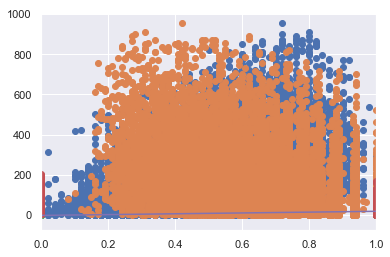

In [46]:
list=[temp_vector,hum_vector,registered_vector,hr_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])

plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

We have encountered a varying line above because this is for most significant features.

Below is the code for the **least significant**:

Coefficient of Determination, or R²: 0.0010576149569256899
Mean Squared Error: 27842.62724343658
Root Mean Squared Error: 166.8611016487563
Mean Absolute Error: 130.93770674822207


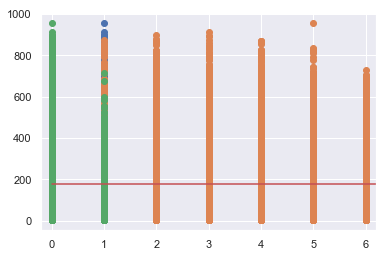

In [47]:
workingday_vector =trial['workingday'].values
weekday_vector=trial['weekday'].values
holiday_vector =trial['holiday'].values
list=[workingday_vector,weekday_vector,holiday_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([-0.2,6.2])

plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

We have encountered a straight line above because this is for least significant features.

### What are the consequences if you remove those features from the model?

If I remove the most significant features from the model; then the model will become faulty. 

Below is the code for the same as we are taking only less significant features (working day, weekday, and holiday) into consideration:

Coefficient of Determination, or R²: 0.0010576149569256899
Mean Squared Error: 27842.62724343658
Root Mean Squared Error: 166.8611016487563
Mean Absolute Error: 130.93770674822207


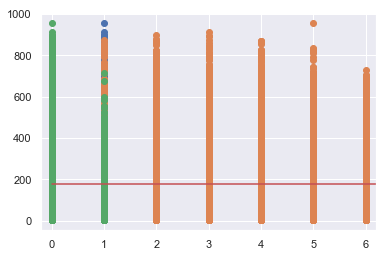

In [48]:
list=[workingday_vector,weekday_vector,holiday_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([-0.2,6.2])

plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

### Produce residual plots and observe the patterns for the goodness of fit

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.


Coefficient of Determination, or R²: 0.27519952089504884
Mean Squared Error: 20201.71520173631
Root Mean Squared Error: 142.13273796608686
Mean Absolute Error: 106.40727432004216


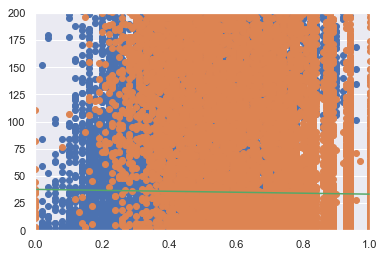

In [49]:
list=[temp_vector,hum_vector]
X=np.column_stack(list)
N = X.shape[0]
T=trial['cnt'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,1])
plt.ylim([0,200])
plt.plot(ls.use(X))

print('Coefficient of Determination, or R²:',metrics.explained_variance_score(T,ls.use(X)))
print('Mean Squared Error:',metrics.mean_squared_error(T,ls.use(X)))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('Mean Absolute Error:',metrics.mean_absolute_error(T,ls.use(X)))

Therefore, a linear regression model is appropriate for the data.

# REFERENCES

[1] "Least mean squares filter”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Least_mean_squares_filter

[2] Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[3] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[4] "Regression analysis”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Regression_analysis

[5] "Least squares”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Least_squares

[6] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[7] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[8] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[9] Dhananjay Arora, "Programming Assignment #0: Data and Visualization", (2019), https://uncc.instructure.com/courses/99514/assignments/555134 

[10] JJ, "MAE and RMSE - Which Metric is Better?”: From Human in a Machine World, from https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

[11] Georgios Drakos, "How to select the Right Evaluation Metric for Machine Learning Models: Part 1 Regression Metrics”: From Towards Data Science, from https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0

[12] "Linear Regression”: From ML Cheatsheet, from https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

[13] "Residual Analysis in Regression”: From AP Statistics Tutorial, Stat Trek, from https://stattrek.com/regression/residual-analysis.aspx

[14] "Linear regression”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Linear_regression

[15] Pavan Sangapati, "A Simple Tutorial on Exploratory Data Analysis”: From Kaggle, from https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis

[16] Bukun, "Forest Cover Type EDA and Modelling”: From Kaggle, from https://www.kaggle.com/ambarish/forest-cover-type-eda-and-modelling

[17] Jake VanderPlas, "Python Data Science Handbook”: From Github, from https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

[18] Skillsmuggler, "EDA and Dimension Reduction”: From Kaggle, from https://www.kaggle.com/skillsmuggler/eda-and-dimension-reduction
